In [1]:
import sys
import pandas
import matplotlib
import seaborn
import sklearn


In [2]:
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [3]:
print(pandas.__version__)

1.1.3


In [5]:
print(matplotlib.__version__)

3.3.2


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:
games= pandas.read_csv("games.csv")
#imports dataset

In [8]:
#print names of columns
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


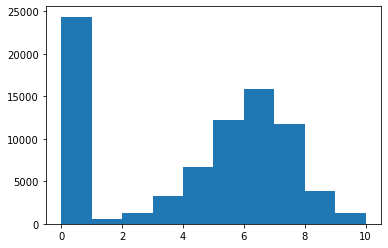

In [9]:
#hoistogram of avg reading
plt.hist(games["average_rating"])
plt.show()

In [10]:
#print first row of games with 0 scores
print(games[games["average_rating"]==0].iloc[0])

#scores greater than 0
print(games[games["average_rating"]>0].iloc[0])


id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

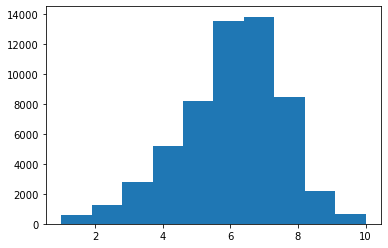

In [11]:
#remove any rows without user reviews
games=games[games["users_rated"]>0]

#remove rows with missing values
games=games.dropna(axis=0)

#make histogram again
plt.hist(games["average_rating"])
plt.show()

In [12]:
print(games.columns)


Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


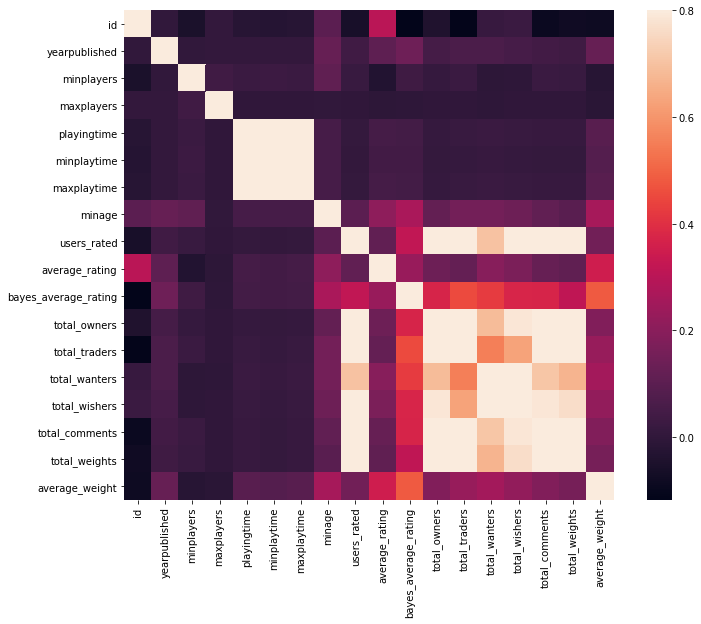

In [15]:
#id doesnt give any information and causes overfitting
#correlation matrix using seaborn

corrmat=games.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()
#shows correlations between the parameters

In [16]:
#get all columns from dataframe
columns=games.columns.tolist()

#filtering columns
columns = [c for c in columns if c not in["bayes_average_rating","average_rating","type","name","id"]]

#store the variable predicting on
target="average_rating"


In [18]:
#split dataset into train and test

from sklearn.model_selection import train_test_split
train=games.sample(frac=0.8, random_state=1)

#select anything not in training and put in test
test=games.loc[~games.index.isin(train.index)]

#printing shapes
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [19]:
from sklearn.linear_model import LinearRegression
lrmodel=LinearRegression()
#create object of model

lrmodel.fit(train[columns],train[target])
#fits model to training data




LinearRegression()

In [20]:
#predictions
predictions=lrmodel.predict(test[columns])

#compute mean squared error
mean_squared_error(predictions,test[target])


NameError: name 'mean_squared_error' is not defined

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lrmodel=LinearRegression()
#create object of model

lrmodel.fit(train[columns],train[target])
#fits model to training data

#predictions
predictions=lrmodel.predict(test[columns])

#compute mean squared error
mean_squared_error(predictions,test[target])


2.0788190326293243

In [23]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_squared_error
rfmodel=RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)

#create object of model

rfmodel.fit(train[columns],train[target])
#fits model to training data

#predictions
predictions=rfmodel.predict(test[columns])

#compute mean squared error
mean_squared_error(predictions,test[target])

1.4458560046071653

In [24]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [25]:
#find rating
ratinglr = lrmodel.predict(test[columns].iloc[0].values.reshape(1,-1))
ratingrf = rfmodel.predict(test[columns].iloc[0].values.reshape(1,-1))

#printing
print(ratinglr)
print(ratingrf)

[8.12061283]
[7.91373581]


In [26]:
test[target].iloc[0]

8.07933